In [ ]:
!date

In [2]:
!sudo apt update

Get:2 http://security.debian.org stretch/updates InRelease [94.3 kB]           
Ign:3 http://deb.debian.org/debian stretch InRelease                           
Get:4 http://deb.debian.org/debian stretch-updates InRelease [91.0 kB]         
Get:5 http://deb.debian.org/debian stretch-backports InRelease [91.8 kB]       
Get:6 http://packages.cloud.google.com/apt gcsfuse-stretch InRelease [3,726 B]
Get:7 http://packages.cloud.google.com/apt cloud-sdk-stretch InRelease [6,377 B]
Get:8 http://deb.debian.org/debian stretch Release [118 kB]              
Get:9 http://deb.debian.org/debian stretch Release.gpg [2,410 B]               
Get:10 http://packages.cloud.google.com/apt google-compute-engine-stretch-stable InRelease [3,843 B]
Get:11 http://packages.cloud.google.com/apt google-cloud-packages-archive-keyring-stretch InRelease [3,876 B]
Hit:12 https://nvidia.github.io/libnvidia-container/debian9/amd64  InRelease
Hit:13 https://nvidia.github.io/nvidia-container-runtime/debian9/amd64  InRele

In [3]:
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (9.0.1-2+deb9u1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [4]:
!sudo pip3 --version

pip 20.0.2 from /usr/local/lib/python3.5/dist-packages/pip (python 3.5)


In [5]:
!sudo pip3 install numpy

In [6]:
!sudo pip3 install pandas

In [7]:
!sudo pip3 install matplotlib

In [8]:
!sudo pip3 install tensorflow


In [9]:
from __future__ import absolute_import, division, print_function

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [10]:
#data1 = pd.read_csv("/home/rick_selby/SupplyChainDataRev3.csv", skiprows = 0)
data1 = pd.read_csv("SupplyChainDataRev3.csv", skiprows = 0)

In [11]:
data1.head()

,SupplierID,ForeignMainland,Cycletime,Location,Class,DefectRate,Cost,ClassLabel,CycNorm,DefNorm,CosNorm
0,7503961,U,49.0,D,Gold,4.0,5.0,2,0.620253,0.129032,0.138889
1,3209120,F,70.0,D,Silver,5.0,8.0,3,0.886076,0.161290,0.222222
2,1783896,M,NaN,C,Silver,5.0,1.0,3,0.000000,0.161290,0.027778
3,9060334,NaN,49.0,D,Tin,7.0,7.0,4,0.620253,0.225806,0.194444
4,3571171,F,66.0,F,Silver,9.0,12.0,3,0.835443,0.290323,0.333333


In [12]:
data1.tail()

,SupplierID,ForeignMainland,Cycletime,Location,Class,DefectRate,Cost,ClassLabel,CycNorm,DefNorm,CosNorm
4995,6182552,F,68.0,B,Silver,6.0,17.0,3,0.860759,0.193548,0.472222
4996,644048,F,NaN,B,Silver,8.0,4.0,3,0.000000,0.258065,0.111111
4997,8498615,F,31.0,C,Tin,15.0,5.0,4,0.392405,0.483871,0.138889
4998,4229294,NaN,41.0,D,Tin,7.0,8.0,4,0.518987,0.225806,0.222222
4999,2698566,M,33.0,F,Tin,14.0,8.0,4,0.417722,0.451613,0.222222


In [13]:
data1nparray = data1.values

In [74]:
TrainData   = data1nparray[:, [8, 9, 10]]
TrainLabels = data1nparray[:, [7]]

In [75]:
TrainDataFloat = TrainData.astype(float)

In [76]:
TrainDataFloat

array([[0.62025317, 0.12903226, 0.13888889],
       [0.88607595, 0.16129032, 0.22222222],
       [0.        , 0.16129032, 0.02777778],
       ...,
       [0.39240506, 0.48387097, 0.13888889],
       [0.51898734, 0.22580645, 0.22222222],
       [0.41772152, 0.4516129 , 0.22222222]])

In [77]:
TrainLabelsInt = TrainLabels.astype(int)

In [78]:
TrainLabelsInt

array([[2],
       [3],
       [3],
       ...,
       [4],
       [4],
       [4]])

In [79]:
TrainData

array([[0.620253165, 0.129032258, 0.13888888900000002],
       [0.8860759490000001, 0.161290323, 0.222222222],
       [0.0, 0.161290323, 0.027777778],
       ...,
       [0.39240506299999994, 0.48387096799999996, 0.13888888900000002],
       [0.5189873420000001, 0.225806452, 0.222222222],
       [0.417721519, 0.45161290299999995, 0.222222222]], dtype=object)

In [80]:
TrainLabels

array([[2],
       [3],
       [3],
       ...,
       [4],
       [4],
       [4]], dtype=object)

In [81]:
model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(1, 6)),
#    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(7, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [82]:
model.compile(
              optimizer='adam', 
#             optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
model.fit(TrainDataFloat, TrainLabelsInt, epochs=10)

Train on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 137us/sample - loss: 1.4622 - accuracy: 0.3712
Epoch 2/10
5000/5000 [==============================] - 0s 55us/sample - loss: 1.2947 - accuracy: 0.3818
Epoch 3/10
5000/5000 [==============================] - 0s 54us/sample - loss: 1.2327 - accuracy: 0.3882
Epoch 4/10
5000/5000 [==============================] - 0s 54us/sample - loss: 1.2134 - accuracy: 0.3882
Epoch 5/10
5000/5000 [==============================] - 0s 54us/sample - loss: 1.2034 - accuracy: 0.3878
Epoch 6/10
5000/5000 [==============================] - 0s 55us/sample - loss: 1.1966 - accuracy: 0.3888
Epoch 7/10
5000/5000 [==============================] - 0s 54us/sample - loss: 1.1911 - accuracy: 0.3910
Epoch 8/10
5000/5000 [==============================] - 0s 53us/sample - loss: 1.1864 - accuracy: 0.3926
Epoch 9/10
5000/5000 [==============================] - 0s 54us/sample - loss: 1.1829 - accuracy: 0.3886
Epoch 10/10
5000/5000 [=========

In [84]:
train_loss, train_acc = model.evaluate(TrainDataFloat, TrainLabelsInt)

print('Train accuracy:', train_acc)


5000/5000 [==============================] - 0s 67us/sample - loss: 1.1773 - accuracy: 0.3894
Train accuracy: 0.3894


In [85]:
predictions = model.predict(TrainDataFloat)


In [86]:
class_names = ['Unknown', 'Platinum', 'Gold', 'Silver', 'Tin']


In [87]:
def plot_image(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  


  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(True)
  plt.xticks([])
  #plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


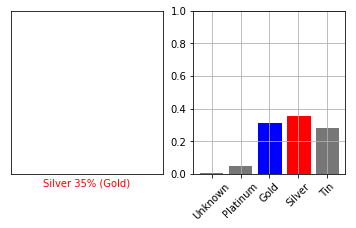

In [88]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, TrainLabelsInt)
plt.subplot(1,2,2)
plot_value_array(i, predictions, TrainLabelsInt)
plt.xticks(range(5), class_names, rotation=45)
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [89]:
predictions[0]


array([0.00330679, 0.05038512, 0.31052402, 0.35394782, 0.28183618],
      dtype=float32)

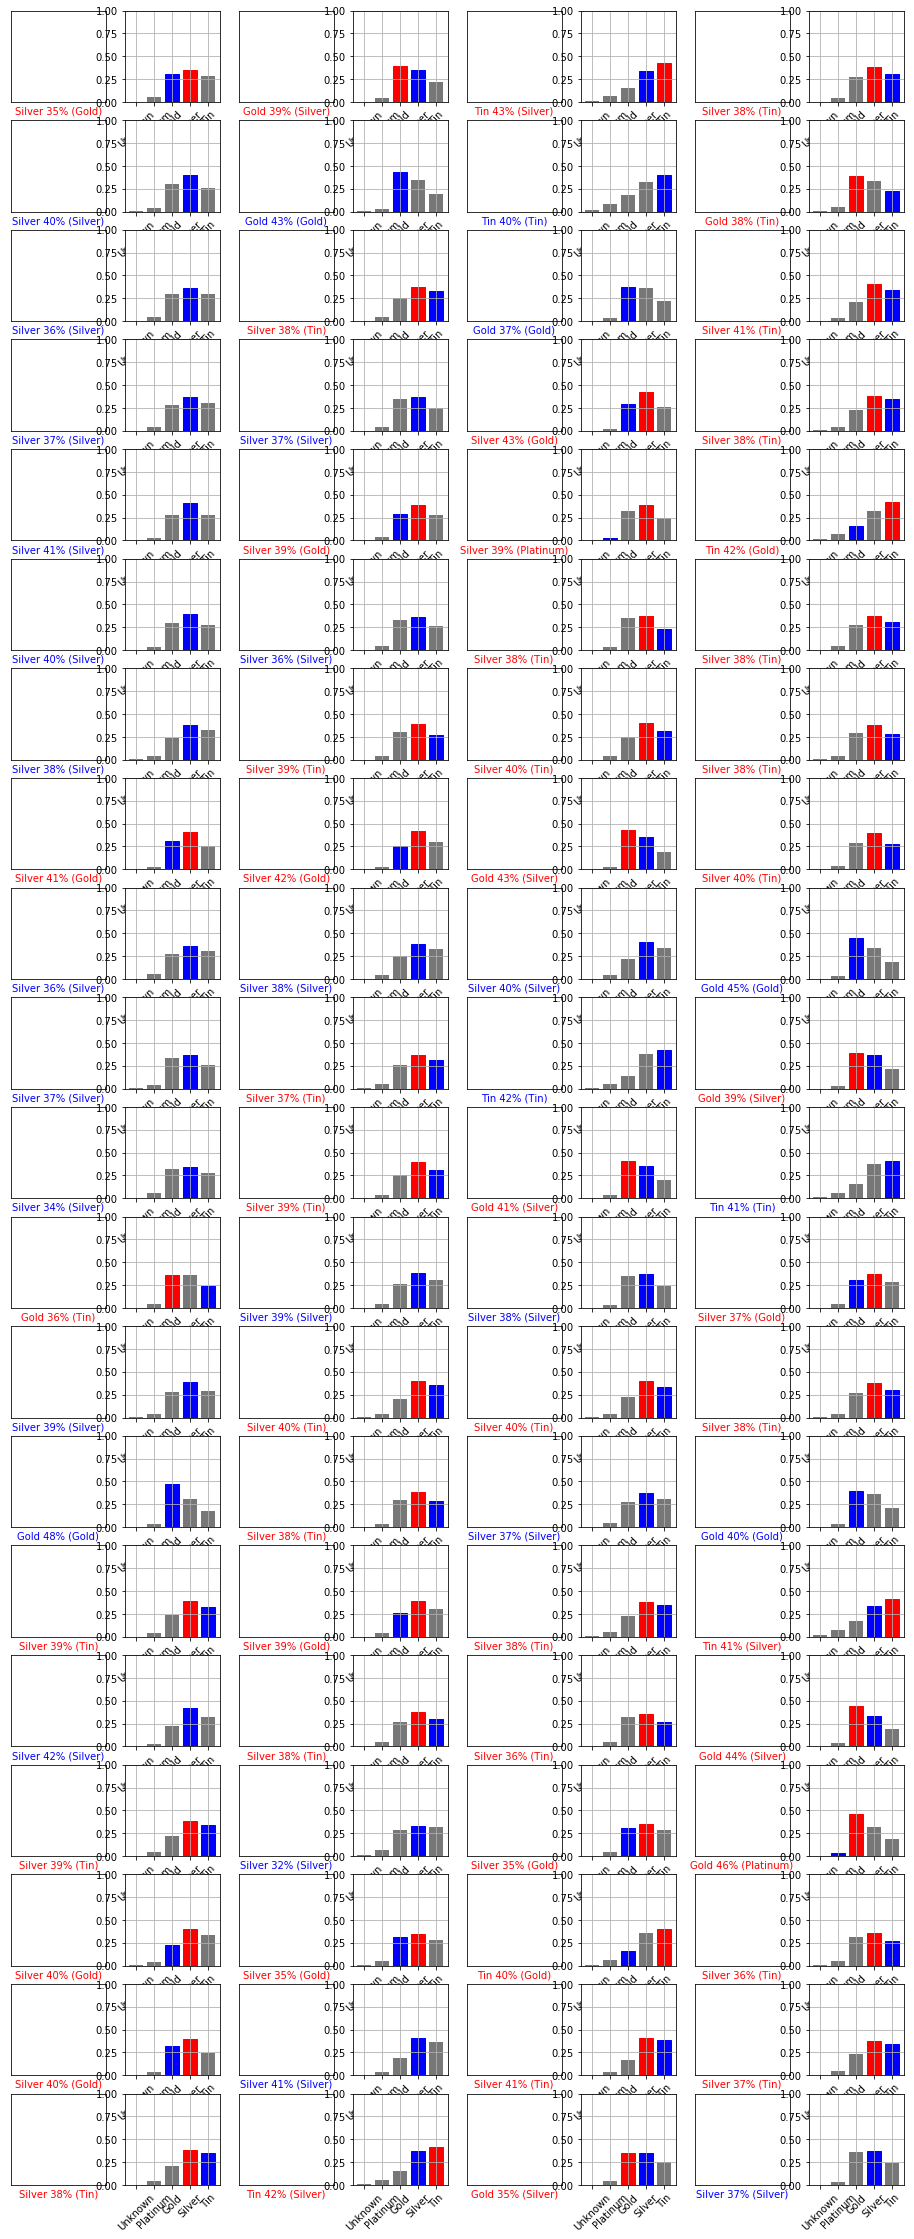

In [90]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, TrainLabelsInt)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, TrainLabelsInt)
  plt.xticks(range(5), class_names, rotation=45)
plt.show()


In [91]:
layer0 = model.get_layer(index=0)


In [92]:
layer0.get_weights()

[array([[-0.14077666,  0.78821987, -0.55689305,  0.6223171 ,  0.6959152 ,
          0.6616391 , -0.13461274],
        [ 0.91568893,  0.08272719, -0.49832252, -0.04667866,  0.32393342,
          0.24461846, -0.27231437],
        [-0.10148446,  0.34866163,  0.56875294, -1.0811114 ,  0.66123074,
          0.02258131, -0.21562088]], dtype=float32),
 array([ 0.515628  ,  0.46401155, -0.15869282, -0.09289422,  0.13689959,
         0.4095827 ,  0.        ], dtype=float32)]

In [93]:
layer1 = model.get_layer(index=1)

In [94]:
layer1.get_weights()

[array([[-1.1787572 , -0.8070771 , -0.64440584,  0.79354405,  0.93290555],
        [-1.0240196 , -0.06117645,  0.07027868, -0.10323793,  0.02162267],
        [ 0.36265936,  0.5577453 , -0.26383242,  0.05589152, -0.03942781],
        [-0.36494213, -0.3741315 ,  1.0967646 , -0.04367484, -0.9585882 ],
        [-0.22862501, -0.50853276,  0.5642241 ,  0.8991286 , -0.2949875 ],
        [-1.5134739 ,  0.3234201 ,  0.84956837, -0.08843692,  0.38983732],
        [ 0.06151754,  0.36738783,  0.158342  ,  0.0407027 ,  0.00700092]],
       dtype=float32),
 array([-0.41462603, -0.23531008, -0.04072637,  0.22291239,  0.34952745],
       dtype=float32)]

In [95]:
#predictionsDF = pd.DataFrame(
#    data=predictions[1:,1:],    # values
#    index=predictions[1:,0],    # 1st column as index
#    columns=predictions[0,1:])  # 1st row as the column names

predictionsDF = pd.DataFrame(
    data=predictions)


In [96]:
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=False, index=False)


In [97]:
PredictedLabels = np.ndarray.copy(TrainLabelsInt)
PredictedOutcomes = np.ndarray.copy(TrainLabelsInt)
for i in range(len(TrainLabelsInt)):
  PredictedLabels[i] = np.argmax(predictions[i])
  if PredictedLabels[i] == TrainLabelsInt[i]:
    PredictedOutcomes[i] = 1
  else:
    PredictedOutcomes[i] = 0


In [98]:
TrainDataLabels = np.append(TrainDataFloat, TrainLabelsInt, axis=1)
TrainDataLabelsPredictions = np.append(TrainDataLabels, PredictedLabels, axis=1)
TrainDataLabelsPredictionsOutcomes = np.append(TrainDataLabelsPredictions, PredictedOutcomes, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions, axis=1)


In [99]:
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb)

In [100]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=False, index=False)

In [101]:
#CycNorm, DefNorm, CosNorm
#Each ranges from 0 to 1
SingleObservation = np.array([[0.9, 0.9, 0.9]])
SingleObservationFloat = SingleObservation.astype(float)
SinglePrediction = model.predict(SingleObservationFloat)

In [102]:
SinglePrediction[0]

array([2.0138439e-04, 1.0210701e-02, 2.0665005e-01, 5.5606586e-01,
       2.2687204e-01], dtype=float32)

In [103]:
np.max(SinglePrediction[0])

0.55606586

In [104]:
np.argmax(SinglePrediction[0])

3

In [105]:
class_names[np.argmax(SinglePrediction[0])]

'Silver'

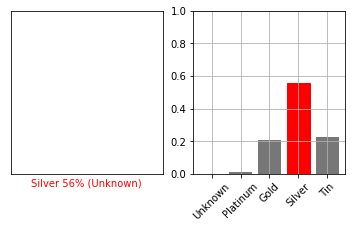

In [106]:
BlankLabels = np.array([[0, 0, 0, 0, 0]])
BlankLabelsInt = BlankLabels.astype(int)

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, SinglePrediction, BlankLabelsInt)
plt.subplot(1,2,2)
plot_value_array(i, SinglePrediction, BlankLabelsInt)
plt.xticks(range(5), class_names, rotation=45)
plt.show()

In [107]:
!date

Fri Mar  6 01:00:37 UTC 2020
